In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE #for balancing an imbalance data
from xgboost import XGBClassifier
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from imblearn import metrics

pd.options.mode.chained_assignment = None  # default='warn'

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [26]:
dataset=df=pd.read_csv('framingham.csv')
dataset.shape

(4238, 16)

Text(0.5, 1.0, 'Class Distributions \n (Yes || No)')

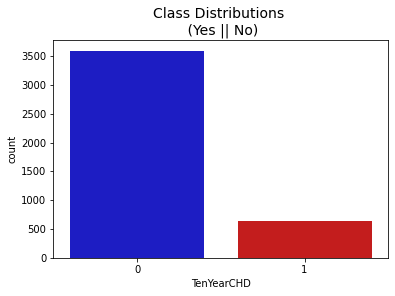

In [118]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('TenYearCHD', data=df, palette=colors)
plt.title('Class Distributions \n (Yes || No)', fontsize=14)

In [27]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [28]:
std_corr = dataset.corr()
print(std_corr['TenYearCHD'].sort_values(ascending = False))

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64


In [29]:
X=dataset.drop(['education','TenYearCHD'], axis=1)
y=dataset['TenYearCHD']

In [30]:
#Cleaning the training data

from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
X['BPMeds']=si.fit_transform(X[['BPMeds']])
si2=SimpleImputer(strategy='mean')
X=pd.DataFrame(si2.fit_transform(X))

X.isnull().any().any()

False

In [31]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0


In [32]:
#Imputing removed column indexes so I add them back
X.columns= X.columns
X.columns= X.columns
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,0.0,61.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0


In [33]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X))
X=pd.DataFrame(sc.transform(X))

X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.462693,-5.929182,-2.964950,-0.821788,-1.203753,-1.082967,-2.121477,-1.188875,-5.362283,-6.060599,-7.051218,-6.268330,-6.282244,-3.599220
1,-2.619122,-5.833898,-2.964950,-0.821788,-1.203753,-1.082967,-2.121477,-1.188875,-5.334284,-6.029707,-6.973663,-6.162106,-6.178488,-3.601138
2,1.462693,-5.806674,1.035607,-0.680028,-1.203753,-1.082967,-2.121477,-1.188875,-5.336829,-6.016321,-6.980714,-6.366708,-6.316829,-3.612646
3,-2.619122,-5.629718,1.035607,-0.609147,-1.203753,-1.082967,2.549264,-1.188875,-5.347011,-5.969983,-6.874957,-6.171159,-6.385999,-3.549353
4,-2.619122,-5.833898,1.035607,-0.658764,-1.203753,-1.082967,-2.121477,-1.188875,-5.316467,-6.011172,-6.952512,-6.501903,-6.247659,-3.583877


In [34]:
#Scaling removed column indexes here i reset them
X.columns= X.columns   
X.columns= X.columns

X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.462693,-5.929182,-2.964950,-0.821788,-1.203753,-1.082967,-2.121477,-1.188875,-5.362283,-6.060599,-7.051218,-6.268330,-6.282244,-3.599220
1,-2.619122,-5.833898,-2.964950,-0.821788,-1.203753,-1.082967,-2.121477,-1.188875,-5.334284,-6.029707,-6.973663,-6.162106,-6.178488,-3.601138
2,1.462693,-5.806674,1.035607,-0.680028,-1.203753,-1.082967,-2.121477,-1.188875,-5.336829,-6.016321,-6.980714,-6.366708,-6.316829,-3.612646
3,-2.619122,-5.629718,1.035607,-0.609147,-1.203753,-1.082967,2.549264,-1.188875,-5.347011,-5.969983,-6.874957,-6.171159,-6.385999,-3.549353
4,-2.619122,-5.833898,1.035607,-0.658764,-1.203753,-1.082967,-2.121477,-1.188875,-5.316467,-6.011172,-6.952512,-6.501903,-6.247659,-3.583877


In [35]:
#Funtion to build and visualise a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} accuracy score:', '{:.2%}'.format(accuracy_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Blues')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [36]:
X.shape

(4238, 14)

In [37]:
#Splitting the data into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [39]:
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [40]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[702   8]
 [133   5]]


In [42]:
print(accuracy_score(y_test,y_pred))

0.8337264150943396


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       710
           1       0.38      0.04      0.07       138

    accuracy                           0.83       848
   macro avg       0.61      0.51      0.49       848
weighted avg       0.77      0.83      0.77       848



In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
auc = roc_auc_score(y_test, y_pred)
auc

0.5124821392120841

### Method 1: Undersampling

In [46]:
# Class count
count_class_0, count_class_1 = df.TenYearCHD.value_counts()

#Divide by class
df_class_0 = df[df['TenYearCHD'] == 0]
df_class_1 = df[df['TenYearCHD'] == 1]

In [47]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.TenYearCHD.value_counts())

Random under-sampling:
0    644
1    644
Name: TenYearCHD, dtype: int64


In [48]:


from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [49]:
# Number of classes in training Data
y_train1.value_counts()

0    2875
1     515
Name: TenYearCHD, dtype: int64

In [50]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(X_train1,y_train1)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [51]:
y_pred1 = classifier.predict(X_test1)

In [52]:
print(accuracy_score(y_test1,y_pred1))

0.8290094339622641


In [53]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       719
           1       0.25      0.06      0.10       129

    accuracy                           0.83       848
   macro avg       0.55      0.51      0.50       848
weighted avg       0.76      0.83      0.78       848



In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
auc = roc_auc_score(y_test1, y_pred1)
auc

0.5143179049282488

### Method2: Oversampling

In [56]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.TenYearCHD.value_counts())

Random over-sampling:
0    3594
1    3594
Name: TenYearCHD, dtype: int64


In [57]:


from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [58]:
# Number of classes in training Data
y_train2.value_counts()

0    2875
1     515
Name: TenYearCHD, dtype: int64

In [59]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(X_train2,y_train2)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [60]:
y_pred2 = classifier.predict(X_test2)

In [61]:
print(accuracy_score(y_test2,y_pred2))

0.8290094339622641


In [62]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       719
           1       0.25      0.06      0.10       129

    accuracy                           0.83       848
   macro avg       0.55      0.51      0.50       848
weighted avg       0.76      0.83      0.78       848



In [63]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test2, y_pred2)
auc


0.5143179049282488

### Method3: SMOTE

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    3594
1    3594
Name: TenYearCHD, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [66]:
# Number of classes in training Data
y_train3.value_counts()

0    2875
1    2875
Name: TenYearCHD, dtype: int64

In [67]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(X_train3,y_train3)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [68]:
y_pred3 = classifier.predict(X_test3)

In [69]:
print(accuracy_score(y_test3,y_pred3))

0.7510431154381085


In [70]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70       719
           1       0.69      0.91      0.79       719

    accuracy                           0.75      1438
   macro avg       0.78      0.75      0.74      1438
weighted avg       0.78      0.75      0.74      1438



In [71]:
auc = roc_auc_score(y_test3, y_pred3)
auc

0.7510431154381085

###Method 5 : Borderline SMOTE 1

In [72]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(sampling_strategy='minority',random_state = 42,kind='borderline-1')
X_bs, y_bs = bsmote.fit_resample(X, y)

y_bs.value_counts()

0    3594
1    3594
Name: TenYearCHD, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_bs, y_bs, test_size=0.2, random_state=15, stratify=y_bs)

In [74]:
# Number of classes in training Data
y_train5.value_counts()

0    2875
1    2875
Name: TenYearCHD, dtype: int64

In [75]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(X_train5,y_train5)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [76]:
y_pred5 = classifier.predict(X_test5)
print(accuracy_score(y_test5,y_pred5))


0.7878998609179416


In [77]:
print(classification_report(y_test5, y_pred5))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75       719
           1       0.72      0.93      0.82       719

    accuracy                           0.79      1438
   macro avg       0.82      0.79      0.78      1438
weighted avg       0.82      0.79      0.78      1438



In [78]:
auc = roc_auc_score(y_test5, y_pred5)
auc

0.7878998609179416

###Method 6: Borderline SMOTE 2

In [79]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(sampling_strategy='minority',random_state = 42,kind='borderline-2')
X_bsm, y_bsm = bsmote.fit_resample(X, y)

y_bsm.value_counts()

0    3594
1    3593
Name: TenYearCHD, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_bsm, y_bsm, test_size=0.2, random_state=15, stratify=y_bsm)

In [81]:
# Number of classes in training Data
y_train6.value_counts()

0    2875
1    2874
Name: TenYearCHD, dtype: int64

In [82]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(X_train6,y_train6)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [83]:
y_pred6 = classifier.predict(X_test6)
print(accuracy_score(y_test6,y_pred6))

0.7990264255910987


In [84]:
print(classification_report(y_test6, y_pred6))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       719
           1       0.76      0.88      0.81       719

    accuracy                           0.80      1438
   macro avg       0.81      0.80      0.80      1438
weighted avg       0.81      0.80      0.80      1438



In [85]:
auc = roc_auc_score(y_test6, y_pred6)
auc

0.7990264255910988

###Method 7 : SVMSmote

In [86]:
from imblearn.over_sampling import SVMSMOTE

svmsmote = SVMSMOTE(sampling_strategy='minority',random_state = 42)
X_svm, y_svm = svmsmote.fit_resample(X, y)

y_svm.value_counts()

0    3594
1    3594
Name: TenYearCHD, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_svm, y_svm, test_size=0.2, random_state=15, stratify=y_svm)

In [88]:
y_train7.value_counts()

0    2875
1    2875
Name: TenYearCHD, dtype: int64

In [89]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(X_train7,y_train7)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [90]:
y_pred7 = classifier.predict(X_test7)
print(accuracy_score(y_test7,y_pred7))

0.8101529902642559


In [91]:
print(classification_report(y_test7, y_pred7))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       719
           1       0.77      0.88      0.82       719

    accuracy                           0.81      1438
   macro avg       0.82      0.81      0.81      1438
weighted avg       0.82      0.81      0.81      1438



In [92]:
auc = roc_auc_score(y_test7, y_pred7)
auc

0.8101529902642559

###Method 8 : ADASYN

In [93]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy='minority',random_state = 42)
X_ada, y_ada = ada.fit_resample(X, y)

y_ada.value_counts()

1    3634
0    3594
Name: TenYearCHD, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_ada, y_ada, test_size=0.2, random_state=15, stratify=y_ada)

In [95]:
y_train8.value_counts()

1    2907
0    2875
Name: TenYearCHD, dtype: int64

In [96]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(X_train8,y_train8)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [97]:
y_pred8 = classifier.predict(X_test8)
print(accuracy_score(y_test8,y_pred8))

0.7406639004149378


In [98]:
print(classification_report(y_test8, y_pred8))

              precision    recall  f1-score   support

           0       0.90      0.54      0.67       719
           1       0.67      0.94      0.78       727

    accuracy                           0.74      1446
   macro avg       0.79      0.74      0.73      1446
weighted avg       0.79      0.74      0.73      1446



In [99]:
auc = roc_auc_score(y_test8, y_pred8)
auc

0.7395578453185592

###Method 9 : SMOTEENN

In [100]:
from imblearn.combine import SMOTEENN

In [101]:

enn = SMOTEENN(sampling_strategy='minority',random_state = 42)
X_smt, y_smt = enn.fit_resample(X, y)

y_smt.value_counts()

1    3164
0    1921
Name: TenYearCHD, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split
X_train9, X_test9, y_train9, y_test9 = train_test_split(X_smt, y_smt, test_size=0.2, random_state=15, stratify=y_smt)

In [103]:
y_train9.value_counts()

1    2531
0    1537
Name: TenYearCHD, dtype: int64

In [104]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(X_train9,y_train9)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [105]:
y_pred9 = classifier.predict(X_test9)
print(accuracy_score(y_test9,y_pred9))

0.8928220255653884


In [106]:
print(classification_report(y_test9, y_pred9))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       384
           1       0.87      0.98      0.92       633

    accuracy                           0.89      1017
   macro avg       0.91      0.87      0.88      1017
weighted avg       0.90      0.89      0.89      1017



In [107]:
auc = roc_auc_score(y_test9, y_pred9)
auc

0.8657558254344392

###Method 10 : SMOTETomek

In [108]:
from imblearn.combine import SMOTETomek

smotetomek = SMOTETomek(sampling_strategy='minority',random_state = 42)
X_smtt, y_smtt = smotetomek.fit_resample(X, y)

y_smtt.value_counts()

0    3542
1    3542
Name: TenYearCHD, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split
X_train10, X_test10, y_train10, y_test10 = train_test_split(X_smtt, y_smtt, test_size=0.2, random_state=15, stratify=y_smtt)

In [110]:
y_train10.value_counts()

1    2834
0    2833
Name: TenYearCHD, dtype: int64

In [111]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(X_train10,y_train10)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [112]:
y_pred10 = classifier.predict(X_test10)
print(accuracy_score(y_test10,y_pred10))

0.7727593507410021


In [113]:
print(classification_report(y_test10, y_pred10))

              precision    recall  f1-score   support

           0       0.92      0.60      0.73       709
           1       0.70      0.95      0.81       708

    accuracy                           0.77      1417
   macro avg       0.81      0.77      0.77      1417
weighted avg       0.81      0.77      0.77      1417



In [114]:
auc = roc_auc_score(y_test10, y_pred10)
auc

0.772881754360801

###Confusion Matrix for all algorithms

In [115]:
import seaborn as sn 



In [116]:
print("KNN Algotithm")
print(classification_report(y_test, y_pred))


print("1 : Undersampling")
print(classification_report(y_test1, y_pred1))


print("2 : Oversampling")
print(classification_report(y_test2, y_pred2))


print("3 : SMOTE")
print(classification_report(y_test3, y_pred3))


# print("4 : Ensemble with Undersampling")
# print(classification_report(y_test4, y_pred_final))


print("5 : Borderline SMOTE 1")
print(classification_report(y_test5, y_pred5))



print("6 : Borderline SMOTE 2")
print(classification_report(y_test6, y_pred6))

print("7 : KNN SMOTE")
print(classification_report(y_test7, y_pred7))

print("8 : ADASYN ")
print(classification_report(y_test8, y_pred8))

print("9 : SMOTEENN ")
print(classification_report(y_test9, y_pred9))

print("10 : SMOTETOMEK ")
print(classification_report(y_test10, y_pred10))


KNN Algotithm
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       710
           1       0.38      0.04      0.07       138

    accuracy                           0.83       848
   macro avg       0.61      0.51      0.49       848
weighted avg       0.77      0.83      0.77       848

1 : Undersampling
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       719
           1       0.25      0.06      0.10       129

    accuracy                           0.83       848
   macro avg       0.55      0.51      0.50       848
weighted avg       0.76      0.83      0.78       848

2 : Oversampling
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       719
           1       0.25      0.06      0.10       129

    accuracy                           0.83       848
   macro avg       0.55      0.51      0.50       848
weighted avg       0.76  